# Boeuf results

In [1]:
# Scientific libraries
import numpy as np
import scipy


# Graphic libraries
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("presentation")
plt.rcParams["figure.figsize"] = (3.5, 3.5)

# Creating alias for magic commands

# LPPview Classes
from LPPview import *
from LPPview.Classes.LPPic_temporal import History
from LPPview.Classes.LPPic_fields import field
from LPPview.Classes.LPPic_fields import field as Field
from LPPview.Classes.LPPic_newwalls import newwalls as Newwalls
from LPPview.Classes.LPPic_temporal import History

from plasmapy.physics import Debye_length
from plasmapy.physics import plasma_frequency
from astropy import units as u


import sys, os
class mute():
    def __enter__(self):
        self.tmp = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, *args):
        sys.stdout = self.tmp


In [2]:
path_ref = "/DATA/tavant/266_Boeuf_166Thomas/"
path_L2 = "/DATA/tavant/158_Beauf_fakeR/"
path_L4 = "/DATA/tavant/163_Beauf_fakeR2/"
paths = [path_ref, path_L4, path_L2]
names = ["no $L_R$", "$L_R$=4cm", "$L_R$=2cm"]
colors = ["k","b", "r"]
fields = [Field(path) for path in paths ]
histories = [History(path)for path in paths ]
walls = [Newwalls(path) for path in paths ]



found 498 files
found 403 files
found 772 files
I've found a temporale file !
found 1 files
loading dat file
I've found a temporale file !
found 1 files
loading dat file
I've found a temporale file !
found 1 files
loading dat file
found 497 files
found 402 files
found 771 files


# Temporal evolutions

In [3]:
hDicts = [h.return_history() for h in histories]
print(hDicts[0].keys())

dict_keys(['time', 'elec', 'ions', 'SUMe_x', 'SUMe_y', 'SUMe_z', 'coll', 'ioni', 'mobi', 'elec_SEE', 'elec_SEE_sup', 'elec_wal', 'elec_cou', 'elec_Oz', 'I_cd', 'I_an', 'I_an_e', 'I_an_i', 'I_beam', 'I_out_electron'])


# Boeuf Instability

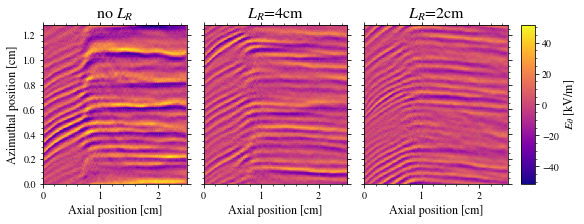

In [4]:
fig, axarr = plt.subplots(1, 3, figsize=(8, 3))

vmax = 0
for f, ax, n in zip(fields, axarr, names):
    tab = f.return_fromkey(-1, "Ej(1)")*1e-3
    vmax = max(vmax, np.abs(tab).max())

for f, ax, n in zip(fields, axarr, names):
    tab = f.return_fromkey(-1, "Ej(1)")*1e-3
    fig = ax.imshow(tab, extent=(0,f._Ly*100, 0, f._Lx*100), aspect="auto", vmin=-vmax, vmax=vmax)
    ax.set_title(n)
    
    ax.set_xlabel("Axial position [cm]")
    
    
for ax in axarr[1:]:
    ax.set_yticklabels([])
    
axarr[0].set_ylabel("Azimuthal position [cm]")
cb = plt.colorbar(fig, ax=axarr[2], fraction=0.05, aspect=30)
cb.ax.set_ylabel("$E_{\\theta}$ [kV/m]")

plt.savefig("Boeuf_Ex_snapshot.png", dpi=400)

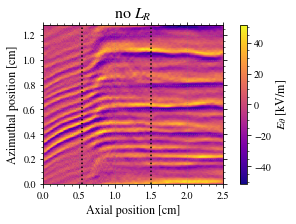

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

vmax = 0
i = 0
f = fields[i]
n = names[i]
tab = f.return_fromkey(-1, "Ej(1)")*1e-3
vmax = max(vmax, np.abs(tab).max())

tab = f.return_fromkey(-1, "Ej(1)")*1e-3
fig = ax.imshow(tab, extent=(0,f._Ly*100, 0, f._Lx*100), aspect="auto", vmin=-vmax, vmax=vmax)
ax.set_title(n)
    
ax.set_xlabel("Axial position [cm]")
        
ax.set_ylabel("Azimuthal position [cm]")
cb = plt.colorbar(fig, ax=ax, fraction=0.05, aspect=30)
cb.ax.set_ylabel("$E_{\\theta}$ [kV/m]")

ax.vlines(110*f._dX*100, 0, f._Lx*100, linewidth=1.5, linestyle=":")
ax.vlines(300*f._dX*100, 0, f._Lx*100, linewidth=1.5, linestyle=":")

plt.savefig("Boeuf_Ex_snapshot_positions.png", dpi=400)

# Investigating No Lr

 771  over  772  over  772628  over  772

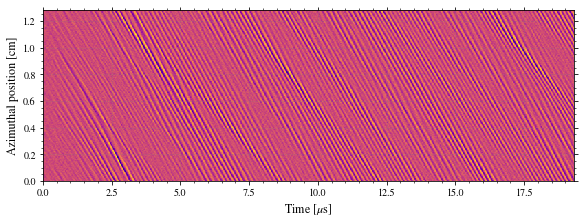

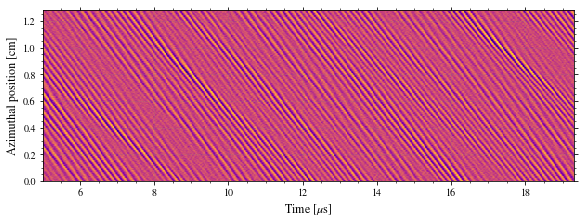

In [20]:
i = 2
f = fields[i]
prefix = "Boeuf_Lr2"

tab = f.return_cut2d("Ej(1)", "y", position=110/f._ymax)

fig, ax = plt.subplots(1, 1, figsize=(8, 3))

im = ax.imshow(tab.T, extent=(0,f._nT*f._dT*f._Na*1e6, 0, f._Lx*100), aspect="auto")

ax.set_xlabel("Time [$\\mu$s]")
ax.set_ylabel("Azimuthal position [cm]")

plt.savefig(prefix+"_y50.png", dpi=300)



fig, ax = plt.subplots(1, 1, figsize=(8, 3))

im = ax.imshow(tab.T[:, 200:], extent=(200*f._dT*f._Na*1e6,f._nT*f._dT*f._Na*1e6, 0, f._Lx*100), aspect="auto")

ax.set_xlabel("Time [$\\mu$s]")
ax.set_ylabel("Azimuthal position [cm]")

plt.savefig(prefix+"_y50_t200.png", dpi=300)

 771  over  772 over  772

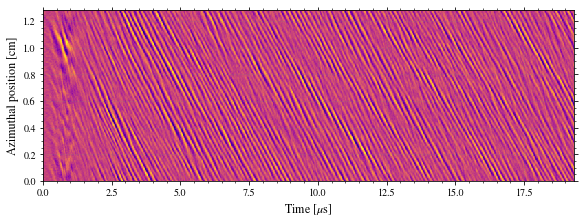

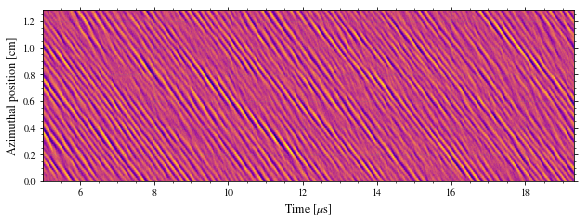

In [10]:
tab = f.return_cut2d("Ej(1)", "y", position=300/f._ymax)

fig, ax = plt.subplots(1, 1, figsize=(8, 3))

im = ax.imshow(tab.T, extent=(0,f._nT*f._dT*f._Na*1e6, 0, f._Lx*100), aspect="auto")

ax.set_xlabel("Time [$\\mu$s]")
ax.set_ylabel("Azimuthal position [cm]")

plt.savefig(prefix+"_y300.png", dpi=300)

fig, ax = plt.subplots(1, 1, figsize=(8, 3))

im = ax.imshow(tab.T[:, 200:], extent=(200*f._dT*f._Na*1e6,f._nT*f._dT*f._Na*1e6, 0, f._Lx*100), aspect="auto")

ax.set_xlabel("Time [$\\mu$s]")
ax.set_ylabel("Azimuthal position [cm]")

plt.savefig(prefix+"_y300_t200.png", dpi=300)

In [11]:
ne_vect = f.meanfield("Nume", "x")
Te_vect = f.meanfield("Eke(1)", "x")

In [12]:
from plasmapy.physics import Debye_length
from plasmapy.physics import plasma_frequency
from astropy import units as u

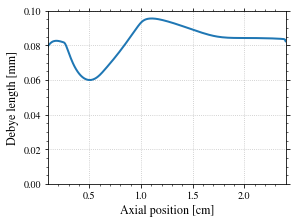

In [13]:
lDe_vect = Debye_length(Te_vect*u.eV, ne_vect/u.m**3,)

f.definecoords()
plt.figure(figsize=(4,3))
plt.plot(f.tab_y, lDe_vect.to(u.mm).value)
plt.ylabel("Debye length [mm]")
plt.xlabel("Axial position [cm]")

plt.xlim(0.1, 2.4)
plt.ylim(0, 0.1)
plt.savefig(prefix+"_Debyelength_axial_profile.pdf")

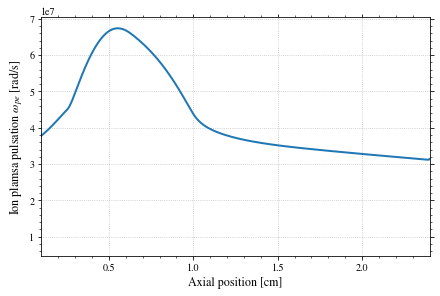

In [14]:
wpi_vect = plasma_frequency(ne_vect/u.m**3, particle="Xe+")

f.definecoords()
plt.figure()
plt.plot(f.tab_y, wpi_vect.value)
plt.ylabel("Ion plamsa pulsation $\\omega_{pe}$ [rad/s]")
plt.xlabel("Axial position [cm]")

plt.xlim(0.1, 2.4)
#plt.ylim(0, 0.1)
plt.savefig(prefix+"_wpi_axial_profile.pdf")

In [15]:
def get_lde_wpi(f):
    
    ne_vect = f.meanfield("Nume", "x")
    Te_vect = f.meanfield("Eke(1)", "x")
    wpi_vect = plasma_frequency(ne_vect/u.m**3, particle="Xe+")
    lDe_vect = Debye_length(Te_vect*u.eV, ne_vect/u.m**3,)

    return wpi_vect, lDe_vect

 771  over  772

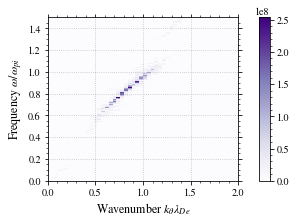

In [15]:
tab = f.return_cut2d("Ej(1)", "y", position=50/f._ymax)

tab_2D = tab.T[:, 200:]

Nx, Ny = tab_2D.shape

Nx_fft, Ny_fft = Nx//2, Ny//2

wavevect = np.fft.fftfreq(Nx, f._dX*1000)[:Nx_fft]
frecvect = np.fft.fftfreq(Ny, f._dT*f._Na*1e6)[:Ny_fft]

lde = lDe_vect[50].to(u.mm).value
wpi = (wpi_vect[50]/u.rad*1e-6).value

kvect = wavevect*2*np.pi*lde
wvect = frecvect*2*np.pi/wpi
argfft2d = np.abs(np.fft.fft2(tab_2D))


fig, ax = plt.subplots(1, 1, figsize=(4, 3))
selectron_toplot = argfft2d[:Nx_fft, :Ny_fft].T

mask = selectron_toplot < 1e7
selectron_toplot[mask] = 0

im = ax.imshow(selectron_toplot, extent=[0, kvect.max(), 0, wvect.max()], aspect="auto", cmap="Purples")
plt.colorbar(im, ax=ax)
ax.set_xlabel("Wavenumber $k_{\\theta} \\lambda_{De}$")
ax.set_ylabel("Frequency $\\omega / \\omega_{pi}$")

plt.savefig(prefix+"_FFT2D_y50_normalized.png", dpi=300)

ax.set_xlim(0, 2)
ax.set_ylim(0, 1.5)
plt.savefig(prefix+"_FFT2D_y50_normalized_zoom.png", dpi=300)


 771  over  772

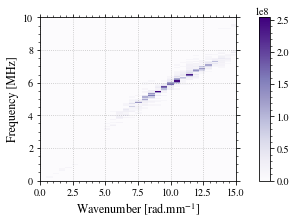

In [16]:

tab = f.return_cut2d("Ej(1)", "y", position=50/f._ymax)
tab_2D = tab.T[:, 200:]

Nx, Ny = tab_2D.shape
Nx_fft, Ny_fft = Nx//2, Ny//2

wavevect = np.fft.fftfreq(Nx, f._dX*1000)[:Nx_fft]*2*np.pi
frecvect = np.fft.fftfreq(Ny, f._dT*f._Na*1e6)[:Ny_fft]

argfft2d = np.abs(np.fft.fft2(tab_2D))


fig, ax = plt.subplots(1, 1, figsize=(4, 3))
selectron_toplot = argfft2d[:Nx_fft, :Ny_fft].T

mask = selectron_toplot < 1e7
selectron_toplot[mask] = 0

im = ax.imshow(selectron_toplot, extent=[0, wavevect.max(), 0, frecvect.max()], aspect="auto", cmap="Purples")
plt.colorbar(im, ax=ax)
ax.set_xlabel("Wavenumber [rad.mm$^{-1}$]")
ax.set_ylabel("Frequency [MHz]")

plt.savefig(prefix+"_FFT2D_y50.png", dpi=300)

ax.set_xlim(0, 15)
ax.set_ylim(0, 10)
plt.savefig(prefix+"_FFT2D_y50_zoom.png", dpi=300)


 771  over  772

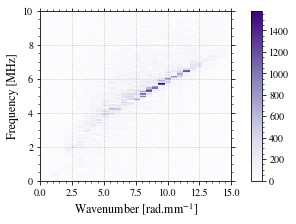

In [17]:
tab = f.return_cut2d("Ej(1)", "y", position=300/f._ymax)

tab_2D = tab.T[:, 200:]

Nx, Ny = tab_2D.shape

Nx_fft, Ny_fft = Nx//2, Ny//2

wavevect = np.fft.fftfreq(Nx, f._dX*1000)[:Nx_fft]*2*np.pi
frecvect = np.fft.fftfreq(Ny, f._dT*f._Na*1e6)[:Ny_fft]


argfft2d = np.abs(np.fft.fft2(tab_2D)) / (Nx*Ny)


fig, ax = plt.subplots(1, 1, figsize=(4, 3))
selectron_toplot = argfft2d[:Nx_fft, :Ny_fft].T

mask = selectron_toplot < 10
selectron_toplot[mask] = 0

im = ax.imshow(selectron_toplot, extent=[0, wavevect.max(), 0, frecvect.max()], aspect="auto", cmap="Purples")
plt.colorbar(im, ax=ax)
ax.set_xlabel("Wavenumber [rad.mm$^{-1}$]")
ax.set_ylabel("Frequency [MHz]")

plt.savefig(prefix+"_FFT2D_y300.png", dpi=300)

ax.set_xlim(0, 15)
ax.set_ylim(0, 10)
plt.savefig(prefix+"_FFT2D_y300_zoom.png", dpi=300)


 771  over  772

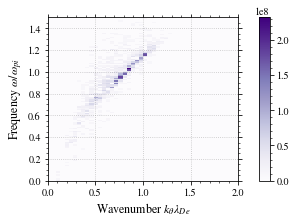

In [18]:
tab = f.return_cut2d("Ej(1)", "y", position=300/f._ymax)

tab_2D = tab.T[:, 200:]

Nx, Ny = tab_2D.shape

Nx_fft, Ny_fft = Nx//2, Ny//2

wavevect = np.fft.fftfreq(Nx, f._dX*1000)[:Nx_fft]
frecvect = np.fft.fftfreq(Ny, f._dT*f._Na*1e6)[:Ny_fft]

lde = lDe_vect[300].to(u.mm).value
wpi = (wpi_vect[300]/u.rad*1e-6).value

kvect = wavevect*2*np.pi*lde
wvect = frecvect*2*np.pi/wpi
argfft2d = np.abs(np.fft.fft2(tab_2D))


fig, ax = plt.subplots(1, 1, figsize=(4, 3))
selectron_toplot = argfft2d[:Nx_fft, :Ny_fft].T

mask = selectron_toplot < 1e7
selectron_toplot[mask] = 0

im = ax.imshow(selectron_toplot, extent=[0, kvect.max(), 0, wvect.max()], aspect="auto", cmap="Purples")
plt.colorbar(im, ax=ax)
ax.set_xlabel("Wavenumber $k_{\\theta} \\lambda_{De}$")
ax.set_ylabel("Frequency $\\omega / \\omega_{pi}$")

plt.savefig(prefix+"_FFT2D_y300_normalized.png", dpi=300)

ax.set_xlim(0, 2)
ax.set_ylim(0, 1.5)
plt.savefig(prefix+"_FFT2D_y300_normalized_zoom.png", dpi=300)


# Full 2D and 1D FFTs

In [16]:
import matplotlib.gridspec as gridspec

def fft_2D_and1D(yindex=50):
    """Compute the 2D fft and add the 1D fft on the sides"""
    
    mainFig = plt.figure( figsize=(3.5, 3.5), facecolor='white')
    
    # define some gridding.
    n_row = 4
    
    AX = gridspec.GridSpec(n_row,n_row,figure=mainFig)
    AX.update(wspace = 0.2, hspace = 0.2)
    
    axHist2d  = plt.subplot(AX[1:,0:-1])
    axHistx = plt.subplot(AX[0,:-1])
    axHisty = plt.subplot(AX[1:,-1])
    # axHist2d = plt.subplot2grid( (n_row, n_row), (1,0), colspan=n_row-1, rowspan=n_row-1 ,fig=mainFig, )
    # axHistx  = plt.subplot2grid( (n_row, n_row), (0,0), colspan=n_row-1 ,fig=mainFig)
    # axHisty  = plt.subplot2grid( (n_row, n_row), (1,n_row-1), rowspan=n_row-1 ,fig=mainFig)
    
    tab = f.return_cut2d("Ej(1)", "y", position=yindex/f._ymax)

    tab_2D = tab.T[:, 200:]

    Nx, Ny = tab_2D.shape

    Nx_fft, Ny_fft = Nx//2, Ny//2

    wavevect = np.fft.fftfreq(Nx, f._dX*1000)[:Nx_fft]
    frecvect = np.fft.fftfreq(Ny, f._dT*f._Na*1e6)[:Ny_fft]

    lde = lDe_vect[yindex].to(u.mm).value
    wpi = (wpi_vect[yindex]/u.rad*1e-6).value

    kvect = wavevect*2*np.pi
    wvect = frecvect*2*np.pi
    argfft2d = np.abs(np.fft.fft2(tab_2D))

    selectron_toplot = argfft2d[:Nx_fft, :Ny_fft].T

    mask = selectron_toplot < 1e6
    selectron_toplot[mask] = 0

    im = axHist2d.imshow((selectron_toplot), extent=[0, kvect.max(), 0, wvect.max()], cmap="Purples")

    axHist2d.set_xlabel("Wavenumber $k_{\\theta}$ [rad.mm$^{-1}$]")
    axHist2d.set_ylabel("Frequency $\\omega$ [rad.MHz]")

    fft_values_x = selectron_toplot.sum(axis=0)
    axHistx.fill_between(kvect, fft_values_x , alpha=0.8)
    
    
    fft_values_y= selectron_toplot.sum(axis=1)
    axHisty.fill_betweenx(wvect, fft_values_y , alpha=0.8)
    
    axHist2d.set_xlim(0, 20)
    axHistx.set_xlim(0, 20)
    axHistx.set_ylim(0)
    
    axHist2d.set_ylim(0, 60)
    axHisty.set_ylim(0, 60)
    axHisty.set_xlim(0)
    
    # Remove axis spines
    axHistx.spines['top'].set_visible(False)
    axHistx.spines['right'].set_visible(False)
    axHistx.spines['left'].set_visible(False)
    axHisty.spines['top'].set_visible(False)
    axHisty.spines['bottom'].set_visible(False)
    axHisty.spines['right'].set_visible(False)
    
    # remove ticks
    axHistx.set_xticks([])
    axHistx.set_yticks([])
    axHisty.set_xticks([])
    axHisty.set_yticks([])

    y_argmax, x_argmax = np.unravel_index(np.argmax(selectron_toplot), selectron_toplot.shape)
    
    #axHist2d.scatter(kvect[x_argmax], wvect[y_argmax])
    axHist2d.hlines(wvect[y_argmax], 0, 0.9*kvect[x_argmax], linewidth=1.5, linestyle=":", alpha=0.7)
    axHist2d.vlines(0.5*(kvect[x_argmax]+kvect[x_argmax+1]), 0, 0.9*wvect[y_argmax], linewidth=1.5, linestyle=":", alpha=0.7)

    return mainFig, axHist2d, axHistx, axHisty


 497  over  498

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


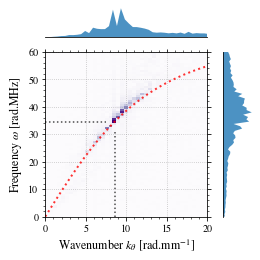

In [18]:
f = fields[0]
prefix = "Boeuf_noLr"

wpi_vect, lDe_vect = get_lde_wpi(f)
wpi_vect /= u.rad
y_index = 110

mainFig, axHist2d, axHistx, axHisty = fft_2D_and1D(y_index)

k_theo = np.linspace(0, 20, 100)
w_theo = wpi_vect[y_index].to(u.megahertz).value * k_theo*lDe_vect[y_index].to(u.mm).value/np.sqrt(1 + (k_theo*lDe_vect[y_index].to(u.mm).value)**2)
axHist2d.plot(k_theo, w_theo, "r:", alpha=0.8)
plt.tight_layout()
plt.savefig(prefix+"_FFT2D_y"+str(y_index)+"_full.png", dpi=300, bbox_inches="tight")



 497  over  498

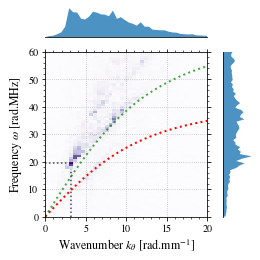

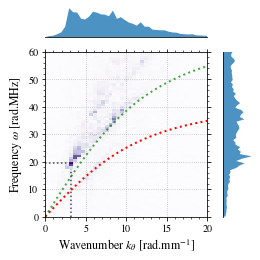

In [19]:
y_index=300
y_index_growth=110

plt.close()
mainFig, axHist2d, axHistx, axHisty = fft_2D_and1D(y_index)


k_theo = np.linspace(0, 20, 100)
w_theo = wpi_vect[y_index].to(u.megahertz).value * k_theo*lDe_vect[y_index].to(u.mm).value/np.sqrt(1 + (k_theo*lDe_vect[y_index].to(u.mm).value)**2)
axHist2d.plot(k_theo, w_theo, "r:")

w_theo = wpi_vect[y_index_growth].to(u.megahertz).value * k_theo*lDe_vect[y_index_growth].to(u.mm).value/np.sqrt(1 + (k_theo*lDe_vect[y_index_growth].to(u.mm).value)**2)
axHist2d.plot(k_theo, w_theo, "g:", alpha=0.7)
plt.savefig(prefix+"_FFT2D_y"+str(y_index)+"_full.png", dpi=300)
mainFig

 402  over  403

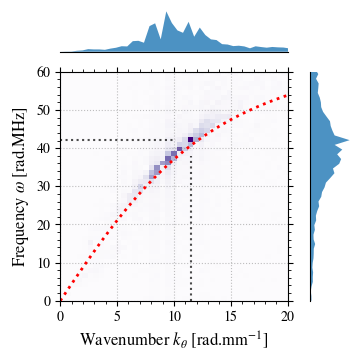

In [191]:
f = fields[1]
names = ["no $L_R$", "$L_R$=4cm", "$L_R$=2cm"]
prefix = "Boeuf_Lr4"

wpi_vect, lDe_vect = get_lde_wpi(f)
wpi_vect /= u.rad

y_index=110
plt.close()
mainFig, axHist2d, axHistx, axHisty = fft_2D_and1D(y_index)

k_theo = np.linspace(0, 20, 100)
w_theo = wpi_vect[y_index].to(u.megahertz).value * k_theo*lDe_vect[y_index].to(u.mm).value/np.sqrt(1 + (k_theo*lDe_vect[y_index].to(u.mm).value)**2)
axHist2d.plot(k_theo, w_theo, "r:")

plt.savefig(prefix+"_FFT2D_y"+str(y_index)+"_full.png", dpi=300)
mainFig

 402  over  403

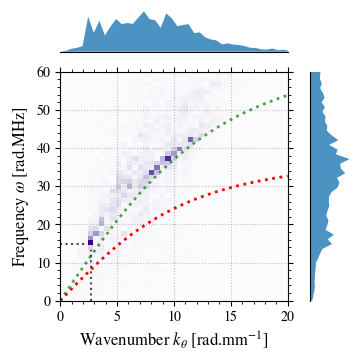

In [192]:

y_index=300
plt.close()
mainFig, axHist2d, axHistx, axHisty = fft_2D_and1D(y_index)


k_theo = np.linspace(0, 20, 100)
w_theo = wpi_vect[y_index].to(u.megahertz).value * k_theo*lDe_vect[y_index].to(u.mm).value/np.sqrt(1 + (k_theo*lDe_vect[y_index].to(u.mm).value)**2)
axHist2d.plot(k_theo, w_theo, "r:")

w_theo = wpi_vect[y_index_growth].to(u.megahertz).value * k_theo*lDe_vect[y_index_growth].to(u.mm).value/np.sqrt(1 + (k_theo*lDe_vect[y_index_growth].to(u.mm).value)**2)
axHist2d.plot(k_theo, w_theo, "g:", alpha=0.7)
plt.savefig(prefix+"_FFT2D_y"+str(y_index)+"_full.png", dpi=300)
mainFig

 771  over  772

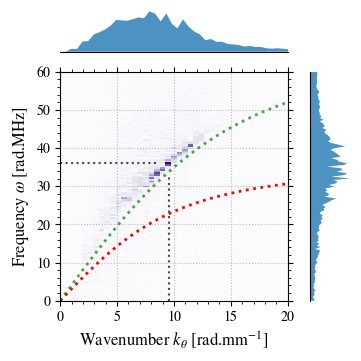

In [193]:
f = fields[2]
names = ["no $L_R$", "$L_R$=4cm", "$L_R$=2cm"]
prefix = "Boeuf_Lr2"

wpi_vect, lDe_vect = get_lde_wpi(f)
wpi_vect /= u.rad


y_index=300
mainFig, axHist2d, axHistx, axHisty = fft_2D_and1D(y_index)


k_theo = np.linspace(0, 20, 100)
w_theo = wpi_vect[y_index].to(u.megahertz).value * k_theo*lDe_vect[y_index].to(u.mm).value/np.sqrt(1 + (k_theo*lDe_vect[y_index].to(u.mm).value)**2)
axHist2d.plot(k_theo, w_theo, "r:", alpha=0.99)

w_theo = wpi_vect[y_index_growth].to(u.megahertz).value * k_theo*lDe_vect[y_index_growth].to(u.mm).value/np.sqrt(1 + (k_theo*lDe_vect[y_index_growth].to(u.mm).value)**2)
axHist2d.plot(k_theo, w_theo, "g:", alpha=0.7)
plt.savefig(prefix+"_FFT2D_y"+str(y_index)+"_full.png", dpi=300)
mainFig


 771  over  772

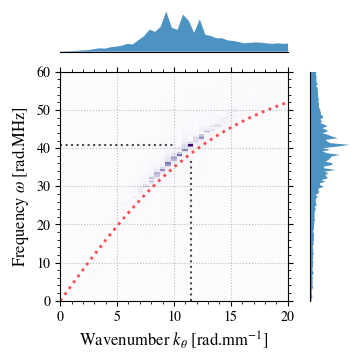

In [194]:
f = fields[2]
names = ["no $L_R$", "$L_R$=4cm", "$L_R$=2cm"]
prefix = "Boeuf_Lr2"

wpi_vect, lDe_vect = get_lde_wpi(f)
wpi_vect /= u.rad


y_index=110
mainFig, axHist2d, axHistx, axHisty = fft_2D_and1D(y_index)


k_theo = np.linspace(0, 20, 100)
w_theo = wpi_vect[y_index].to(u.megahertz).value * k_theo*lDe_vect[y_index].to(u.mm).value/np.sqrt(1 + (k_theo*lDe_vect[y_index].to(u.mm).value)**2)
axHist2d.plot(k_theo, w_theo, "r:", alpha=0.7)


plt.savefig(prefix+"_FFT2D_y"+str(y_index)+"_full.png", dpi=300)
mainFig


In [ ]:
def fft_2D_and1D_normalized(yindex=50):
    """Compute the 2D fft and add the 1D fft on the sides"""
    
    mainFig = plt.figure(1, figsize=(5, 5), facecolor='white')

    # define some gridding.
    n_row = 5
    axHist2d = plt.subplot2grid( (n_row, n_row), (1,0), colspan=n_row-1, rowspan=n_row-1 )
    axHistx  = plt.subplot2grid( (n_row, n_row), (0,0), colspan=n_row-1 )
    axHisty  = plt.subplot2grid( (n_row, n_row), (1,n_row-1), rowspan=n_row-1 )
    
    tab = f.return_cut2d("Ej(1)", "y", position=yindex/f._ymax)

    tab_2D = tab.T[:, 200:]

    Nx, Ny = tab_2D.shape

    Nx_fft, Ny_fft = Nx//2, Ny//2

    wavevect = np.fft.fftfreq(Nx, f._dX*1000)[:Nx_fft]
    frecvect = np.fft.fftfreq(Ny, f._dT*f._Na*1e6)[:Ny_fft]

    lde = lDe_vect[yindex].to(u.mm).value
    wpi = (wpi_vect[yindex]/u.rad*1e-6).value

    kvect = wavevect*2*np.pi*lde
    wvect = frecvect*2*np.pi/wpi
    argfft2d = np.abs(np.fft.fft2(tab_2D))

    selectron_toplot = argfft2d[:Nx_fft, :Ny_fft].T

    mask = selectron_toplot < 1e7
    selectron_toplot[mask] = 0

    im = axHist2d.imshow(selectron_toplot, extent=[0, kvect.max(), 0, wvect.max()], cmap="Purples")

    axHist2d.set_xlabel("Wavenumber $k_{\\theta} \\lambda_{De}$")
    axHist2d.set_ylabel("Frequency $\\omega / \\omega_{pi}$")

    fft_values_x = selectron_toplot.sum(axis=0)
    axHistx.fill_between(kvect, fft_values_x )
    
    
    fft_values_y= selectron_toplot.sum(axis=1)
    axHisty.fill_betweenx(wvect, fft_values_y )
    
    axHist2d.set_xlim(0, 2)
    axHistx.set_xlim(0, 2)
    axHistx.set_ylim(0)
    
    axHist2d.set_ylim(0, 1.5)
    axHisty.set_ylim(0, 1.5)
    axHisty.set_xlim(0)
    
    # Remove axis spines
    axHistx.spines['top'].set_visible(False)
    axHistx.spines['right'].set_visible(False)
    axHistx.spines['left'].set_visible(False)
    axHisty.spines['top'].set_visible(False)
    axHisty.spines['bottom'].set_visible(False)
    axHisty.spines['right'].set_visible(False)

    # remove ticks
    axHistx.set_xticks([])
    axHistx.set_yticks([])
    axHisty.set_xticks([])
    axHisty.set_yticks([])

    y_argmax, x_argmax = np.unravel_index(np.argmax(selectron_toplot), selectron_toplot.shape)
    
    #axHist2d.scatter(kvect[x_argmax], wvect[y_argmax])
    axHist2d.hlines(wvect[y_argmax], 0, 0.9*kvect[x_argmax], linewidth=1.5, linestyle=":", alpha=0.7)
    axHist2d.vlines(kvect[x_argmax], 0, 0.9*wvect[y_argmax], linewidth=1.5, linestyle=":", alpha=0.7)

    return mainFig, axHist2d, axHistx, axHisty


In [ ]:
for f in fields:
    print(f._imax/(255*500))

In [ ]:
mainFig, axHist2d, axHistx, axHisty = fft_2D_and1D(300)
plt.savefig(prefix+"_FFT2D_y"+str(300)+"_normalized_full.png", dpi=300)
mainFig


# Variation of the instability characteristics

In [251]:
def axial_variation(N_dots=10, fig=None, ax1=None, ax2=None):
    """Compute the 2D fft and add the 1D fft on the sides"""
    
    y_indexes = np.linspace(0.1*f._ymax, 0.9*f._ymax, N_dots, dtype=np.int)
    
    w_values = np.zeros(N_dots)
    k_values = np.zeros(N_dots)
    
    for i, yindex in enumerate(y_indexes):

        tab = f.return_cut2d("Ej(1)", "y", position=yindex/f._ymax)

        tab_2D = tab.T[:, 200:]

        Nx, Ny = tab_2D.shape

        Nx_fft, Ny_fft = Nx//2, Ny//2

        wavevect = np.fft.fftfreq(Nx, f._dX*1000)[:Nx_fft]
        frecvect = np.fft.fftfreq(Ny, f._dT*f._Na*1e6)[:Ny_fft]

        lde = lDe_vect[yindex].to(u.mm).value
        wpi = (wpi_vect[yindex]/u.rad*1e-6).value

        kvect = wavevect*2*np.pi
        wvect = frecvect*2*np.pi
        argfft2d = np.abs(np.fft.fft2(tab_2D))

        selectron_toplot = argfft2d[:Nx_fft, :Ny_fft].T

        

        y_argmax, x_argmax = np.unravel_index(np.argmax(selectron_toplot), selectron_toplot.shape)
        
        w_values[i] = wvect[y_argmax]
        k_values[i] = kvect[x_argmax]
    
  

    if fig is None:
        fig, [ax1, ax2] = plt.subplots(1,2, figsize=(8, 3))
    
    ax1.plot(f.tab_y[y_indexes], w_values, 'o-')
    ax1.set_ylabel("Pulsation $\\omega $ [rad/$\\mu$s]")
       
    ax2.plot(f.tab_y[y_indexes], k_values, "o-")
    ax2.set_ylabel("Wavenumber  $k_{\\theta}$ [rad/mm]")
    
    for ax in [ax1, ax2]:
        ax.set_xlabel("Axial position [cm]")
    
    
    return fig, ax1, ax2

fig, ax1, ax2 = axial_variation(50)
ax2.set_ylim(0, 10)
ax1.set_ylim(0, 40)
    

plt.savefig(prefix+"Axial_evolution.pdf")


 497  over  498

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


FigureCanvasNbAgg()

In [6]:
def axial_variation_normalized(N_dots=10, fig=None, ax1=None, ax2=None, f = fields[0]):
    """Compute the 2D fft and add the 1D fft on the sides"""

    if fig is None:
        fig, [ax1, ax2] = plt.subplots(1,2, figsize=(8, 3))
    
    ax1.plot(f.tab_y[y_indexes], w_values, 'o-')
    ax1.set_ylabel("Frequency $\\omega / \\omega_{pi}$")
       
    ax2.plot(f.tab_y[y_indexes], k_values, "o-")
    ax2.set_ylabel("Wavenumber  $k_{\\theta} \\lambda_{De}$")
    
    for ax in [ax1, ax2]:
        ax.set_xlabel("Axial position [cm]")
    
    
    return fig, ax1, ax2


In [5]:
def comute_mainwave(N_dots=10, f=None):
        
    f.definecoords()
    
    y_indexes = np.linspace(0.1*f._ymax, 0.9*f._ymax, N_dots, dtype=np.int)
    
    w_values = np.zeros(N_dots)
    k_values = np.zeros(N_dots)
    
    wpi_vect, lDe_vect = get_lde_wpi(f)
    
    for i, yindex in enumerate(y_indexes):

        tab = f.return_cut2d("Ej(1)", "y", position=yindex/f._ymax)

        tab_2D = tab.T[:, 200:]

        Nx, Ny = tab_2D.shape

        Nx_fft, Ny_fft = Nx//2, Ny//2

        wavevect = np.fft.fftfreq(Nx, f._dX*1000)[:Nx_fft]
        frecvect = np.fft.fftfreq(Ny, f._dT*f._Na*1e6)[:Ny_fft]

        lde = lDe_vect[yindex].to(u.mm).value
        wpi = (wpi_vect[yindex]/u.rad*1e-6).value

        kvect = wavevect*2*np.pi
        wvect = frecvect*2*np.pi
        argfft2d = np.abs(np.fft.fft2(tab_2D))

        selectron_toplot = argfft2d[:Nx_fft, :Ny_fft].T

        y_argmax, x_argmax = np.unravel_index(np.argmax(selectron_toplot), selectron_toplot.shape)
        
        w_values[i] = wvect[y_argmax]
        k_values[i] = kvect[x_argmax]
        
    return f.tab_y[y_indexes], w_values, k_values

In [286]:

f = fields[0]
y_indexes_0, w_values_0, k_values_0 = comute_mainwave(50, f)

y_indexes_1, w_values_1, k_values_1 = comute_mainwave(50, f= fields[1])

y_indexes_2, w_values_2, k_values_2 = comute_mainwave(50, f= fields[2])


 771  over  772

In [294]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(8, 3))

ax1.plot(y_indexes_0, w_values_0, 'o', label=names[0], alpha=1, )
ax2.plot(y_indexes_0, k_values_0, 'o', alpha=1, )

ax1.plot(y_indexes_1, w_values_1, '^', label=names[1], alpha=1, )
ax2.plot(y_indexes_1, k_values_1, '^', alpha=1, )

ax1.plot(y_indexes_2, w_values_2, 's', label=names[2], alpha=1, )
ax2.plot(y_indexes_2, k_values_2, 's', alpha=1, )

ax1.legend()
ax1.set_ylabel("Pulsation $\\omega$ [10$^6$ rad/s]")
ax2.set_ylabel("Wavenumber  $k_{\\theta}$ [rad/mm]")
    
for ax in [ax1, ax2]:
    ax.set_xlabel("Axial position [cm]")
    
plt.savefig("Boeuf_caracteristics_all.pdf")

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


FigureCanvasNbAgg()

In [290]:
def comute_mainwave_normalized(N_dots=10, f=None):
        
    f.definecoords()
    
    y_indexes = np.linspace(0.1*f._ymax, 0.9*f._ymax, N_dots, dtype=np.int)
    
    w_values = np.zeros(N_dots)
    k_values = np.zeros(N_dots)
    
    wpi_vect, lDe_vect = get_lde_wpi(f)
    
    for i, yindex in enumerate(y_indexes):

        tab = f.return_cut2d("Ej(1)", "y", position=yindex/f._ymax)

        tab_2D = tab.T[:, 200:]
        Nx, Ny = tab_2D.shape
        Nx_fft, Ny_fft = Nx//2, Ny//2

        wavevect = np.fft.fftfreq(Nx, f._dX*1000)[:Nx_fft]
        frecvect = np.fft.fftfreq(Ny, f._dT*f._Na*1e6)[:Ny_fft]

        lde = lDe_vect[yindex].to(u.mm).value
        wpi = (wpi_vect[yindex]/u.rad*1e-6).value

        kvect = wavevect*2*np.pi*lde
        wvect = frecvect*2*np.pi/wpi
        argfft2d = np.abs(np.fft.fft2(tab_2D))

        selectron_toplot = argfft2d[:Nx_fft, :Ny_fft].T

        y_argmax, x_argmax = np.unravel_index(np.argmax(selectron_toplot), selectron_toplot.shape)
        
        w_values[i] = wvect[y_argmax]
        k_values[i] = kvect[x_argmax]
        
    return f.tab_y[y_indexes], w_values, k_values

In [291]:

f = fields[0]
y_indexes_0_norm, w_values_0_norm, k_values_0_norm = comute_mainwave_normalized(50, f)

y_indexes_1_norm, w_values_1_norm, k_values_1_norm = comute_mainwave_normalized(50, f= fields[1])

y_indexes_2_norm, w_values_2_norm, k_values_2_norm = comute_mainwave_normalized(50, f= fields[2])


 771  over  772

In [293]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(8, 3))

wpi_vect, lDe_vect = get_lde_wpi(fields[0])
ax1.plot(y_indexes_0_norm, w_values_0_norm, 'o', label=names[0], alpha=1, )
ax2.plot(y_indexes_0_norm, k_values_0_norm, 'o', alpha=1, )

ax1.plot(y_indexes_1_norm, w_values_1_norm, '^', label=names[1], alpha=1, )
ax2.plot(y_indexes_1_norm, k_values_1_norm, '^', alpha=1, )

ax1.plot(y_indexes_2_norm, w_values_2_norm, 's', label=names[2], alpha=1, )
ax2.plot(y_indexes_2_norm, k_values_2_norm, 's', alpha=1, )

ax1.legend()
ax1.set_ylabel("Frequency $\\omega / \\omega_{pi}$")
ax2.set_ylabel("Wavenumber  $k_{\\theta} \\lambda_{De}$")
    
for ax in [ax1, ax2]:
    ax.set_xlabel("Axial position [cm]")
    
plt.savefig("Boeuf_caracteristics_all_normalized.pdf")

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


FigureCanvasNbAgg()

In [200]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(8, 3))

icut= 10

for f, n in zip(fields, names):
    f.definecoords()
    wpi_vect, lDe_vect = get_lde_wpi(f)
    
    ax1.plot(f.tab_y[icut:-icut], wpi_vect[icut:-icut]*1e-6, label=n)
    ax2.plot(f.tab_y[icut:-icut], lDe_vect[icut:-icut]*1e5)
    
ax1.set_ylabel("Ion plasma pulsation $\\omega_{pi}$ [10$^6$ rad/s]")
ax2.set_ylabel("Debye length $\\lambda_{De}$ [10$^{-5}$m]")

ax1.legend()

for ax in [ax1, ax2]:
    ax.set_xlabel("Axial position [cm]")
    
plt.savefig("Boeuf_opi_Lde.pdf")

FigureCanvasNbAgg()

# Axial evolution of the wavevectore

In [120]:
def comute_Axial_spectrogram_normalized(N_dots=10, f=None):
        
    f.definecoords()
    
    y_indexes = np.linspace(0.1*f._ymax, 0.9*f._ymax, N_dots, dtype=np.int)
    
    w_values = []
    k_values = []
    
    wpi_vect, lDe_vect = get_lde_wpi(f)
    
    for i, yindex in enumerate(y_indexes):

        tab = f.return_cut2d("Ej(1)", "y", position=yindex/f._ymax)

        tab_2D = tab.T[:, 200:]
        Nx, Ny = tab_2D.shape
        Nx_fft, Ny_fft = Nx//2, Ny//2

        wavevect = np.fft.fftfreq(Nx, f._dX*1000)[:Nx_fft]
        frecvect = np.fft.fftfreq(Ny, f._dT*f._Na*1e6)[:Ny_fft]

        lde = lDe_vect[yindex].to(u.mm).value
        wpi = (wpi_vect[yindex]/u.rad*1e-6).value

        kvect = wavevect*2*np.pi
        wvect = frecvect*2*np.pi
        argfft2d = np.abs(np.fft.fft2(tab_2D))

        selectron_toplot = argfft2d[:Nx_fft, :Ny_fft].T

        #y_argmax, x_argmax = np.unravel_index(np.argmax(selectron_toplot), selectron_toplot.shape)
        
        
        
        w_values.append( selectron_toplot.sum(axis=1) )
        k_values.append( selectron_toplot.sum(axis=0))
        
    return f.tab_y[y_indexes], w_values, k_values, wvect, kvect

 497  over  498

In [157]:
z_positions,  w_values, k_values, wvect, kvect = comute_Axial_spectrogram_normalized(N_dots=50, f=fields[0])

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 3))

ax1.pcolormesh(z_positions, wvect, np.array(w_values).T, cmap="Purples")
im = ax2.pcolormesh(z_positions, kvect, np.array(k_values).T, cmap="Purples")

for ax in [ax1, ax2]:
    ax.set_xlabel("Axial position [cm]")
    
ax1.set_ylabel("Pulsation $\\omega$ [rad.MHz]")
ax2.set_ylabel("Wavenumber $k_{\\theta}$ [rad.MHz]")

ax1.set_ylim(0, 100)
ax2.set_ylim(0, 30)

cb = fig.colorbar(im,   ticks=[np.array(k_values).min(), np.array(k_values).max()])
#cb.set_ticks([0, 1])
cb.ax.set_yticklabels(["min", "max"])


FigureCanvasNbAgg()

[Text(1, 0, 'min'), Text(1, 0, 'max')]

In [158]:
z_positions,  w_values, k_values, wvect, kvect = comute_Axial_spectrogram_normalized(N_dots=50, f=fields[1])

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 3))

ax1.pcolormesh(z_positions, wvect, np.array(w_values).T, cmap="Purples")
im = ax2.pcolormesh(z_positions, kvect, np.array(k_values).T, cmap="Purples")

for ax in [ax1, ax2]:
    ax.set_xlabel("Axial position [cm]")
    
ax1.set_ylabel("Pulsation $\\omega$ [rad.MHz]")
ax2.set_ylabel("Wavenumber $k_{\\theta}$ [rad.MHz]")

ax1.set_ylim(0, 100)
ax2.set_ylim(0, 30)

cb = fig.colorbar(im,   ticks=[np.array(k_values).min(), np.array(k_values).max()])
#cb.set_ticks([0, 1])
cb.ax.set_yticklabels(["min", "max"])


 402  over  403

FigureCanvasNbAgg()

[Text(1, 0, 'min'), Text(1, 0, 'max')]

In [161]:
z_positions_0,  w_values_0, k_values_0, wvect_0, kvect_0 = comute_Axial_spectrogram_normalized(N_dots=50, f=fields[0])
z_positions_1,  w_values_1, k_values_1, wvect_1, kvect_1 = comute_Axial_spectrogram_normalized(N_dots=50, f=fields[1])
z_positions_2,  w_values_2, k_values_2, wvect_2, kvect_2 = comute_Axial_spectrogram_normalized(N_dots=50, f=fields[2])


 771  over  772

In [168]:

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 3))

ax1.pcolormesh(z_positions_0, wvect_0, np.array(w_values_0).T, cmap="inferno")
im = ax2.pcolormesh(z_positions_0, kvect_0, np.array(k_values_0).T, cmap="inferno")

for ax in [ax1, ax2]:
    ax.set_xlabel("Axial position [cm]")
    
ax1.set_ylabel("Pulsation $\\omega$ [rad.MHz]")
ax2.set_ylabel("Wavenumber $k_{\\theta}$ [rad.MHz]")

ax1.set_ylim(0, 100)
ax2.set_ylim(0, 30)

cb = fig.colorbar(im,   ticks=[np.array(k_values_0).min(), np.array(k_values_0).max()])
#cb.set_ticks([0, 1])
cb.ax.set_yticklabels(["min", "max"])
plt.savefig("Boeuf_axila_evolution_fft1D_noLr.png", dpi=400)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


FigureCanvasNbAgg()

In [167]:

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 3))

ax1.pcolormesh(z_positions_1, wvect_1, np.array(w_values_1).T, cmap="inferno")
im = ax2.pcolormesh(z_positions_1, kvect_1, np.array(k_values_1).T, cmap="inferno")

for ax in [ax1, ax2]:
    ax.set_xlabel("Axial position [cm]")
    
ax1.set_ylabel("Pulsation $\\omega$ [rad.MHz]")
ax2.set_ylabel("Wavenumber $k_{\\theta}$ [rad.MHz]")

ax1.set_ylim(0, 100)
ax2.set_ylim(0, 30)

cb = fig.colorbar(im,   ticks=[np.array(k_values_1).min(), np.array(k_values_1).max()])
#cb.set_ticks([0, 1])
cb.ax.set_yticklabels(["min", "max"])
plt.savefig("Boeuf_axila_evolution_fft1D_Lr4.png", dpi=400)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


FigureCanvasNbAgg()

In [166]:

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 3))

ax1.pcolormesh(z_positions_2, wvect_2, np.array(w_values_2).T, cmap="inferno")
im = ax2.pcolormesh(z_positions_2, kvect_2, np.array(k_values_2).T, cmap="inferno")

for ax in [ax1, ax2]:
    ax.set_xlabel("Axial position [cm]")
    
ax1.set_ylabel("Pulsation $\\omega$ [rad.MHz]")
ax2.set_ylabel("Wavenumber $k_{\\theta}$ [rad.MHz]")

ax1.set_ylim(0, 100)
ax2.set_ylim(0, 30)

cb = fig.colorbar(im,   ticks=[np.array(k_values_2).min(), np.array(k_values_2).max()])
#cb.set_ticks([0, 1])
cb.ax.set_yticklabels(["min", "max"])
plt.savefig("Boeuf_axila_evolution_fft1D_Lr2.png", dpi=400)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


FigureCanvasNbAgg()

[Text(1, 0, 'min'), Text(1, 0, 'max')]